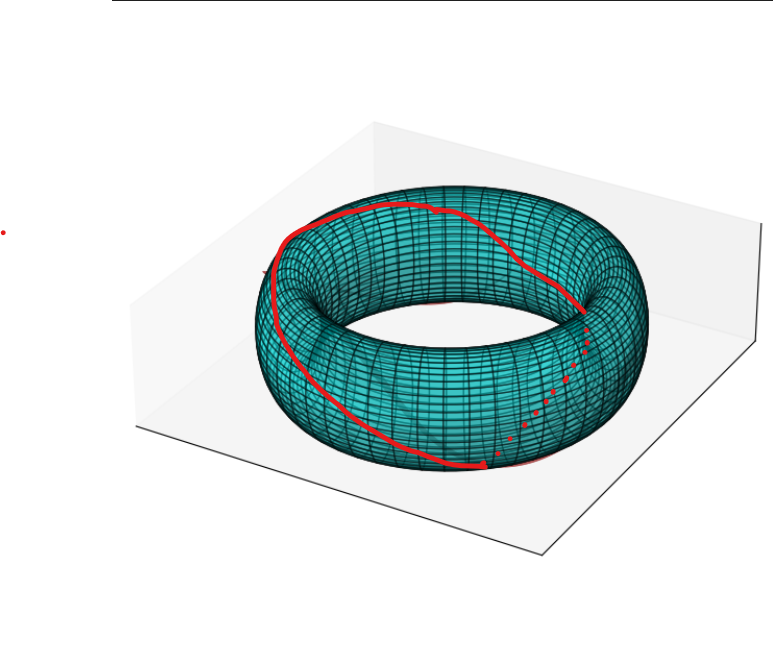

In [2]:
# display the mock torus to show the diagonal cluster
# display the probabilities distribution and confidence interval etc

from IPython.display import display
from PIL import Image

# Load and display the image
image = Image.open("mock_torus.png")  # Replace with your actual filename
display(image)


In [4]:
import pandas as pd

df = pd.read_excel('M0.4D0.0001E0.9A0.8_100x100_first_cluster.xlsx')
print(df)

     Run ID  num iterations
0       442           50001
1       444          290001
2       445          680001
3       447           95001
4       443         1025001
..      ...             ...
595    1041          770001
596    1042         1445001
597    1044           80001
598    1045          455001
599    1046          110001

[600 rows x 2 columns]


Exponential Fit: λ (MLE) = 0.000001
95% Confidence Interval for λ: (9.857849660960216e-07, 1.157261224050038e-06)
Pareto Fit: α (MLE) = 0.482456
Log-Likelihood - Exponential: -8847.86
Log-Likelihood - Pareto: -8772.84


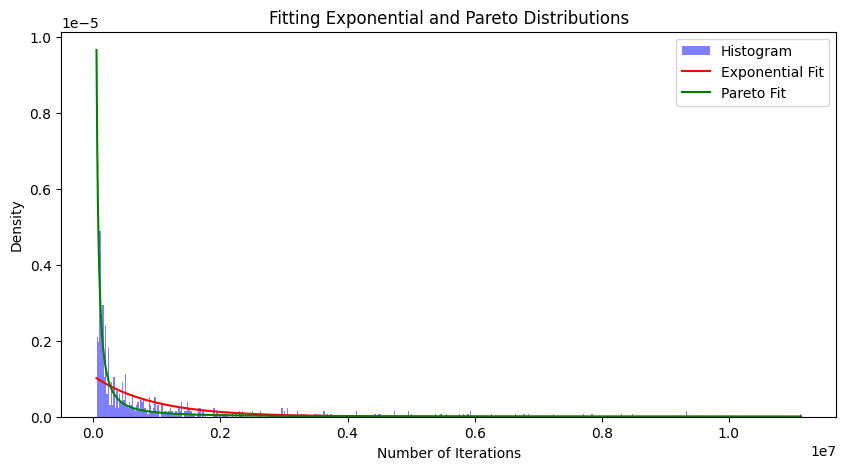

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load your dataframe (df) containing "num iterations"
# df = pd.read_csv("your_data.csv")  # Uncomment if reading from a file

# Extract the 'num iterations' column
num_iterations = df["num iterations"].values

# ---- 1. Fit an Exponential Distribution ----
lambda_mle = 1 / np.mean(num_iterations)  # MLE for lambda (1/mean)

# Confidence Interval for lambda
n = len(num_iterations)
lambda_std_err = lambda_mle / np.sqrt(n)  # Standard error
alpha = 0.05  # 95% confidence level
z_critical = stats.norm.ppf(1 - alpha / 2)  # Critical z-value
lambda_ci = (lambda_mle - z_critical * lambda_std_err, lambda_mle + z_critical * lambda_std_err)

print(f"Exponential Fit: λ (MLE) = {lambda_mle:.6f}")
print(f"95% Confidence Interval for λ: {lambda_ci}")

# ---- 2. Fit a Pareto Distribution ----
shape_mle, loc, scale = stats.pareto.fit(num_iterations, floc=0)  # Fix location at 0
print(f"Pareto Fit: α (MLE) = {shape_mle:.6f}")

# ---- 3. Compare Fit using Log-Likelihood ----
exp_log_likelihood = np.sum(stats.expon.logpdf(num_iterations, scale=1/lambda_mle))
pareto_log_likelihood = np.sum(stats.pareto.logpdf(num_iterations, shape_mle, loc=0, scale=scale))

print(f"Log-Likelihood - Exponential: {exp_log_likelihood:.2f}")
print(f"Log-Likelihood - Pareto: {pareto_log_likelihood:.2f}")

# ---- 4. Plot Histogram with Fitted Distributions ----
x = np.linspace(min(num_iterations), max(num_iterations), 1000)

# Exponential PDF
exp_pdf = stats.expon.pdf(x, scale=1/lambda_mle)

# Pareto PDF
pareto_pdf = stats.pareto.pdf(x, shape_mle, loc=0, scale=scale)

# Plot histogram with fitted distributions
plt.figure(figsize=(10, 5))
plt.hist(num_iterations, bins=500, density=True, alpha=0.5, color='blue', label='Histogram')
plt.plot(x, exp_pdf, 'r-', label='Exponential Fit')
plt.plot(x, pareto_pdf, 'g-', label='Pareto Fit')
plt.xlabel("Number of Iterations")
plt.ylabel("Density")
plt.title("Fitting Exponential and Pareto Distributions")
plt.legend()
plt.show()
